In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

In [2]:
df = pd.read_csv("D:/5 Semester/Machine Learning/taxi_trip_pricing.csv")  # Replace with your actual file name

In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric (coerce errors to NaN)
        except Exception as e:
            print(f"Could not convert column {col}: {e}")

In [7]:
df = df.dropna(axis=1, how='all')  # Remove columns with all NaN values

# Step 2: Handle Missing Values (NaN) using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Use mean to fill missing values
df_imputed = imputer.fit_transform(df)  # Perform imputation; returns NumPy array


In [8]:
df = pd.DataFrame(df_imputed, columns=df.columns[:df_imputed.shape[1]])

In [9]:
print(df.head())

   Trip_Distance_km  Passenger_Count  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0         19.350000              3.0   3.560000         0.80             0.32   
1         47.590000              1.0   3.502989         0.62             0.43   
2         36.870000              1.0   2.700000         1.21             0.15   
3         30.330000              4.0   3.480000         0.51             0.15   
4         27.070547              3.0   2.930000         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  
0                  53.82   36.262400  
1                  40.57   56.874773  
2                  37.27   52.903200  
3                 116.81   36.469800  
4                  22.64   15.618000  


In [10]:
z_scores = np.abs(zscore(df))
threshold = 3  # Define a threshold for outliers
df = df[(z_scores < threshold).all(axis=1)]

In [12]:
X = df.iloc[:, :-1].values  # All columns except the last as features
y = df.iloc[:, -1].values 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)


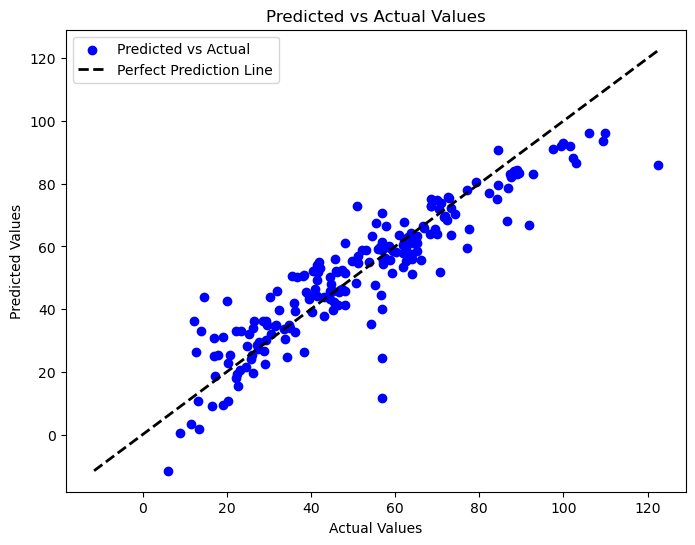

In [28]:
plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization

# Scatter plot for Predicted vs Actual
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")

# Perfect Prediction Line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label="Perfect Prediction Line")

# Adding labels and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.show()


In [31]:
x_annotation = y_test.max() * 0.7  # Adjust X annotation position
y_annotation = y_pred.max() * 0.9  # Adjust Y annotation position

In [39]:
print(df.columns)  # List all column names
print(df.head())   

Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')
   Trip_Distance_km  Passenger_Count  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0         19.350000              3.0   3.560000         0.80             0.32   
1         47.590000              1.0   3.502989         0.62             0.43   
2         36.870000              1.0   2.700000         1.21             0.15   
3         30.330000              4.0   3.480000         0.51             0.15   
4         27.070547              3.0   2.930000         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  
0                  53.82   36.262400  
1                  40.57   56.874773  
2                  37.27   52.903200  
3                 116.81   36.469800  
4                  22.64   15.618000  


In [40]:

# Use only a small sample of the data for plotting
plot_sample = df.sample(1000, random_state=42)  # Plot only 1,000 points
plt.scatter(plot_sample['Actual'], plot_sample['Predicted'], color="blue", label="Predicted vs Actual")



ValueError: Cannot take a larger sample than population when 'replace=False'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


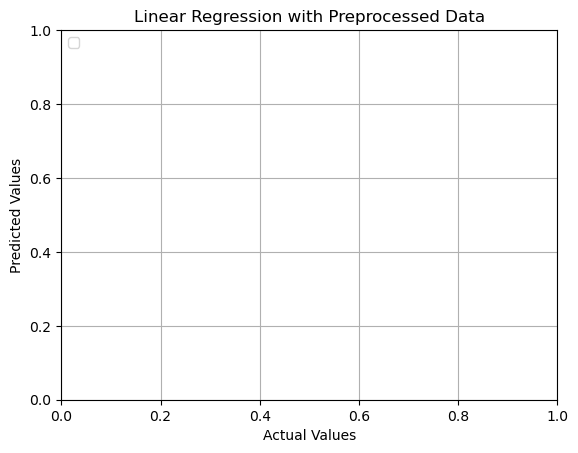

In [20]:
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression with Preprocessed Data")
plt.legend(loc="upper left")
plt.grid(True)

In [22]:
plt.show()